In [8]:
!pip install gymnasium

In [9]:
 # رفع الدرايف
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
# مسار مجلد العمل
working_folder='/content/drive/MyDrive/RLModels/'
# مسار النموذج
model_path = working_folder + "cartpole_dqn_model.h5"


In [11]:
# تحميل نموذج شبكة
from tensorflow.keras.models import load_model

# تحميل ملف النموذج
model = load_model(model_path)

# طباعة ملخص النموذج
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 24)                  │             120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 24)                  │             600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │              50 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 770 (3.01 KB)

 Trainable params: 770 (3.01 KB)

 Non-trainable params: 0 (0.00 B)

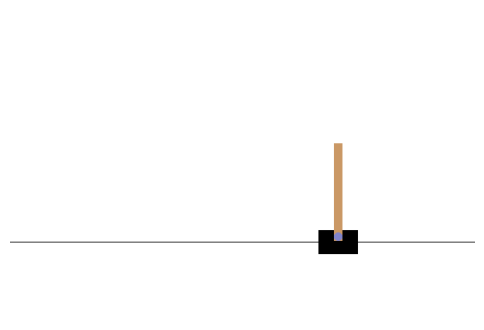

Total reward from the test episode: 500.0


In [12]:
# مكتبة البيئات
import gymnasium as gym
import numpy as np

# مكتبة الرسم
import matplotlib.pyplot as plt
# مكتبة العرض
from IPython.display import display, clear_output

# إنشاء البيئة
env = gym.make('CartPole-v1', render_mode='rgb_array')

# تهيئة البيئة
state, info = env.reset()

# إنشاء رسم بياني لعرض بيئة اللعبة
fig, ax = plt.subplots(figsize=(6, 6))

# تهيئة المتغيرات لاختبار النموذج
done = False
total_reward = 0

# حلقة لاختبار النموذج وعرض أداء الوكيل
while not done:
    # إعداد الحالة المناسبة لدخل الشبكة
    state = state.reshape(1, 4)

    # الحصول على قيم جودة الأفعال الموافقة للحالة
    q_values = model.predict(state, verbose=0)

    # إيجاد الفعل الموافق لأكبر قيمة
    action = np.argmax(q_values[0])

    # تنفيذ الفعل في البيئة
    next_state, reward, terminated, truncated, info = env.step(action)

    # الحصول على الإطار من البيئة
    frame = env.render()

    # تحديث الرسم البياني بالإطار الحالي من البيئة
    ax.clear()  # مسح الإطار السابق
    ax.imshow(frame)  # عرض الإطار الحالي
    ax.axis('off')  # إخفاء المحاور لتحسين العرض

    # مسح الإخراج السابق وعرض الشكل الحالي
    clear_output(wait=True)
    display(fig)
    plt.pause(1)  # التوقف مؤقتًا لإنشاء تأثير  الحركة

    # تحديث المكافأة الإجمالية والحالة
    total_reward += reward
    state = next_state  # الانتقال إلى الحالة التالية

    # التحقق من انتهاء الحلقة
    if terminated or truncated:
        done = True

# طباعة المكافأة الإجمالية التي تم الحصول عليها من الحلقة الاختبارية
print(f"Total reward from the test episode: {total_reward}")